In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Questão 24



## 1) Entrar os coeficientes

consideração: entrar com as restrições em formado de >= 

In [137]:
A = [[-4, 0],[-4, -8], [-8, -20]]
B = [-12, -20, -50]
C = [-50, -75]
prob = 'min'
ineq = []
non_negative = True

## 2) printar a função objetiva e as restrições

In [138]:
def f_a(A, B, C, prob, ineq, non_negative=True) -> None:
    ineq = []

    if not ineq:
        if prob == 'max':
            ineq = ['<='] * len(B)
        elif prob == 'min':
            ineq = ['>='] * len(B)

    print(f"Otimização de:  {prob} Z = {C[0]}x + {C[1]}y")

    print("\nSujeito a:")
    for i in range(len(A)):
        print(f"        {A[i][0]}x + {A[i][1]}y {ineq[i]} {B[i]}")
    
    if non_negative:
        print("\n Tal que: x, y >= 0")

    return None

In [139]:
f_a(A, B, C, prob, ineq, non_negative)

Otimização de:  min Z = -50x + -75y

Sujeito a:
        -4x + 0y >= -12
        -4x + -8y >= -20
        -8x + -20y >= -50

 Tal que: x, y >= 0


## 3) printar a função objetiva e as restrições

### Melhorar essa etapa do codigo, pois ainda nao usa os coeficientes, essa etapa é hard code

Text(0, 0.5, '$y$')

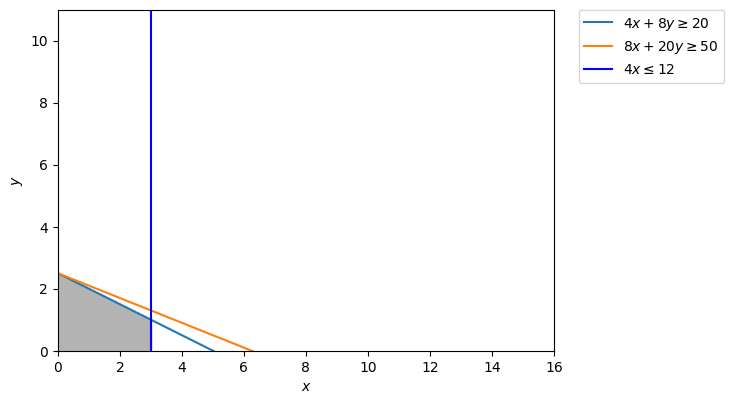

In [140]:
d = np.linspace(-2,16,300)

x,y = np.meshgrid(d,d)

plt.imshow( ((0*y <= (12 - 4*x)) & # 4x + 0y <= 12
             (8*y <= (20 - 4*x)) & # 4x + 8y <= 20
             (20*y <= (50 - 8*x))  # 8x + 20y <= 50
             ).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
#Dado que x = x1 
#         y = x2

x = np.linspace(0, 16, 2000)
# 8x1 + 6x2 >= 4
y1 = (20 - 4*x)/8.0
#x1 + 2x2 = 12
y2 = (50 - 8*x)/20.0

# Make plot
#plt.plot(3, 0)
plt.plot(x, y1, label=r'$4x + 8y \geq 20$')
plt.plot(x, y2, label=r'$8x + 20y \geq 50$')
plt.axvline(x=3, color='b', label='$4x \leq 12$')
plt.xlim(0,16)
plt.ylim(0,11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## 4) Calcular as interseções

In [141]:
A = [[-4, 0],[-4, -8], [-8, -20]]
B = [-12, -20, -50]
C = [-50, -75]

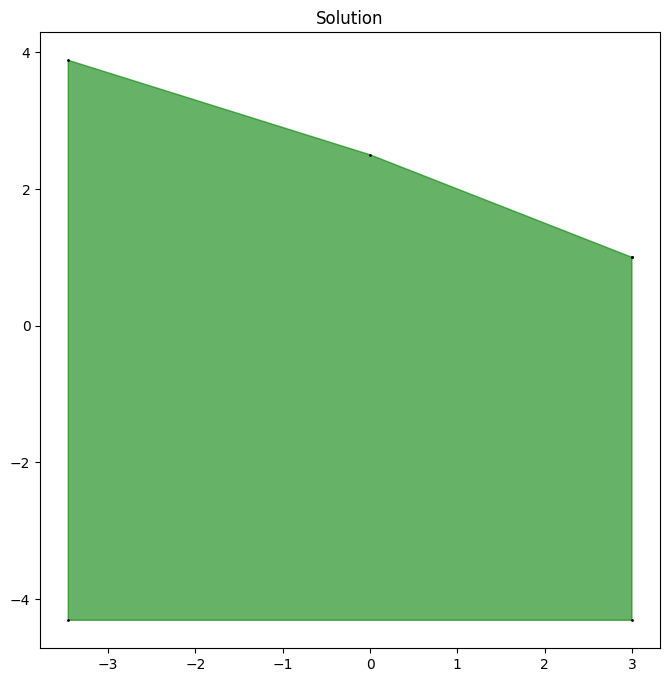

In [142]:
from intvalpy import lineqs
import numpy as np

A = np.array(A)
b = np.array(B)

dots = lineqs(A, b, title='Solution', s=1.0, color='Green', alpha=0.6, size=(8,8))

In [143]:
print(dots)

[[ 3.          1.        ]
 [ 3.         -4.31034483]
 [-3.45689655 -4.31034483]
 [-3.45689655  3.88275862]
 [-0.          2.5       ]]


## 5) Calcular os calores da função objetica

In [144]:
print(f"Dado: Z = {C[0]}x + {C[1]}y \n")

z_solutions = {}
x_list = []
for dot in dots:
    solution = round(C[0]*dot[0] + C[1]*dot[1], 4)
    ponto = f"{dot[0]},{dot[1]}"
    z_solutions.update({solution: ponto})
    
    print(f"Z({ponto}) = {solution}")

Dado: Z = -50x + -75y 

Z(3.0,1.0) = -225.0
Z(3.0,-4.310344827586) = 173.2759
Z(-3.456896551724,-4.310344827586) = 496.1207
Z(-3.456896551724,3.88275862069) = -118.3621
Z(-0.0,2.5) = -187.5


In [145]:
z_solutions

{-225.0: '3.0,1.0',
 173.2759: '3.0,-4.310344827586',
 496.1207: '-3.456896551724,-4.310344827586',
 -118.3621: '-3.456896551724,3.88275862069',
 -187.5: '-0.0,2.5'}

 ## 6) Retornar o valor de menor ou maior dependendo da otimizacao

In [146]:
max(z_solutions. values()) 

'3.0,1.0'

In [147]:
z_solutions[min(z_solutions)]

'3.0,1.0'

In [149]:
if prob == 'max':
    print(f"O valor maximo da zona factivel é {max(z_solutions)} encontrado no ponto Z({z_solutions[max(z_solutions)]})")
elif prob == 'min':
    if min(z_solutions) < 0:
        result = min(z_solutions) * -1
    else:
        result = min(z_solutions)
    print(f"O valor minimo da zona factivel é {result} encontrado no ponto Z({z_solutions[min(z_solutions)]})")

O valor minimo da zona factivel é 225.0 encontrado no ponto Z(3.0,1.0)


In [116]:
c0 = 1
dot0 = 1
c1 = 1
dot1 = 1

In [117]:
round(c0*dot0 + c1*dot1, 4)

2

In [ ]:
C = [[4, 0],[4, 8], [8, 20]]
A = [12, 20, 50]
b = [50, 75]

In [84]:
### Import the neccessary libraries
import numpy as np
import scipy as sp
# Get matrices
# c = [-8, -12, -22]
# A = [[17, 27, 34], [12, 21, 15]]
# b = [91800, 42000]
# define the upper bound and the lower bound
R = (0, None)
T = (0, None)
M = (0, None)
# Implementing the Simplex Algorithm
from scipy.optimize import linprog
# Solve the problem by Simplex method in Optimization
res = linprog(c, A_ub=A, b_ub=b,  bounds=(R, T, M), method='simplex', options={"disp": True})  # linear programming p[roblem
print(res) # print results

ModuleNotFoundError: No module named 'scipy'